In [12]:
#!/usr/bin/env python
import os
import pickle
import numpy as np
import matplotlib.pyplot as pl
from pylab import rcParams
#import seaborn as sb

In [13]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
#sb.set_style('whitegrid')

In [14]:
data = pickle.load(open('MC_Info_angle_1_10000.p'))
#data = pickle.load(open('MC_Info_angle_3_10000.p'))

isolate = []
for elem in data:
    if 'a0002' in elem:
        if 'angle' in elem:
            isolate.append(elem)

In [15]:
accepted = []
rejected = []
for idx, element in enumerate(isolate):
    if 'accepted' in element:
        accepted.append([idx,element[2]])
    if 'rejected' in element:
        rejected.append([idx,element[2]])
        
xaxis1 = [accepted[i][0] for i in range(len(accepted))]
yaxis1 = [accepted[i][1] for i in range(len(accepted))]
xaxis2 = [rejected[i][0] for i in range(len(rejected))]
yaxis2 = [rejected[i][1] for i in range(len(rejected))]
        
# Data for animation
mc_results = np.zeros(len(isolate))
steps = np.arange(len(isolate))
for idx, elem in enumerate(isolate):
    mc_results[idx] = elem[2]        

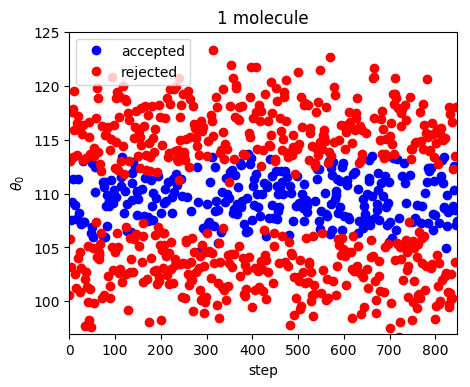

In [19]:
fig = pl.figure()
ax = fig.add_subplot(111)
ax.plot(xaxis1,yaxis1,'bo',label='accepted')
ax.plot(xaxis2,yaxis2,'ro',label='rejected')
ax.set_xlim([steps[0],steps[-1]])
ax.set_ylim([97,125])
ax.set_xlabel('step')
ax.set_ylabel(r'$\theta_0$')
ax.legend()
ax.set_title('1 molecule')

In [18]:
acceptance_ratio = float(len(accepted))/float(len(accepted)+len(rejected))
acceptance_ratio

0.3231132075471698

In [20]:
%matplotlib osx

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig = pl.figure()
ax = fig.add_subplot(111)
ax.set_xlim([steps[0],steps[-1]])
ax.set_ylim([97,125])

line, = ax.plot([],[],'ko',animated=True)

def animate(i):
    x = steps[:i]
    y = mc_results[:i]
    line.set_data(x,y)
    return line,

def init():
    line.set_data([],[])
    return line,
    
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, frames=len(steps),
                               interval=25, blit=True)

HTML(anim.to_html5_video())

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
import sys

fig = pl.figure()

ax = fig.add_subplot(111)
ax.set_xlim([steps[0],steps[-1]])
ax.set_ylim([97,125])

lines = [ax.plot([],[],'bo',animated=True)[0], ax.plot([],[],'ro',animated=True)[0]]

xaxis1 = list(xaxis1)
yaxis1 = list(yaxis1)
xaxis2 = list(xaxis2)
yaxis2 = list(yaxis2)

def init():
    for line in lines:
        line.set_data([],[])
    return lines

def animate(i):
    if i in xaxis1:
        idx = xaxis1.index(i)
        x1 = xaxis1[:idx]
        y1 = yaxis1[:idx]
        #print(x1)
        count = range(i)
        count.sort(reverse=True)
        for j in count:
            try:
                idx2 = xaxis2.index(j)
                x2 = xaxis2[:idx2]
                y2 = yaxis2[:idx2]
            except ValueError:
                pass
        lines[0].set_data(x1,y1)           
    if i in xaxis2:
        idx = xaxis2.index(i)
        x2 = xaxis2[:idx]
        y2 = yaxis2[:idx]
        #print(x2)
        count = range(i)
        count.sort(reverse=True)
        for j in count:
            try:
                idx2 = xaxis1.index(j)
                x1 = xaxis1[:idx2]
                y1 = yaxis1[:idx2]
            except ValueError: 
                pass
        lines[1].set_data(x2,y2)
    return lines

    
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, frames=len(steps),
                               interval=25, blit=True)

HTML(anim.to_html5_video())